In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
X, y = make_classification(n_samples=200,n_features=2,n_classes=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, class_sep=1, random_state=35)

In [6]:
X.shape

(200, 2)

In [7]:
y.shape

(200,)

In [9]:
pd.Series(y).value_counts()

1    100
0    100
dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
X_train.shape

(160, 2)

In [23]:
X_test.shape

(40, 2)

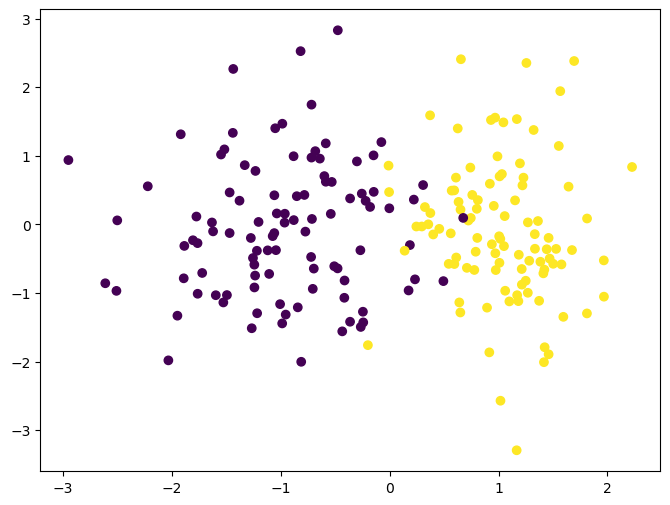

In [27]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)

In [29]:
# X_train

### Perceptron Trick

In [59]:
class PerceptronClassification:
    def __init__(self,lr,epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        
    def step(self,eqn_value):
        return 0 if eqn_value <= 0 else 1
    
    def fit(self,X_train,y_train):
        X_train =  np.insert(X_train, 0, 1, axis=1)
        self.weights = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            j = np.random.randint(low=0,high=X_train.shape[0])
            
            fit_line = np.dot(X_train[j],self.weights)
            y_hat = self.step(fit_line)
            self.weights = self.weights + self.lr*(y_train[j]-y_hat)*X_train[j]
            
        return self.weights[0], self.weights[1:]
    
    def predict(self,X_test):
#         print(X_test.shape)
#         print(self.weights[1:].shape)
        return self.weights[0] + np.dot(X_test,self.weights[1:])

In [72]:
obj = PerceptronClassification(lr=0.01)
intercept, coefficient = obj.fit(X_train,y_train)

In [73]:
y_pred_raw = obj.predict(X_test)

In [74]:
y_pred = []
for i in range(len(y_pred_raw)):
    if y_pred_raw[i] < 0:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test,y_pred)

0.925

In [85]:
m = coefficient[0] / coefficient[1]
b = intercept / coefficient[1]

In [86]:
m

5.3809879048972435

In [87]:
b

0.04211481262473851

In [90]:
y_pred_raw

array([ 1.50078948,  0.09400268,  1.40476067, -1.35624903,  1.09666535,
        0.11627088,  1.15291324, -0.6453297 , -1.00127644, -2.35422504,
        1.64371566,  0.89499311,  1.25326527,  1.88720091, -2.69791056,
        1.70268039, -2.27662509,  1.08060196,  1.87799292, -2.48439071,
        1.7277565 , -0.52339654, -2.1309489 , -1.51194679,  0.0608478 ,
        1.39418596, -1.64024086, -1.79633279,  1.27553427, -1.96891175,
        1.40323296,  1.50991884, -0.59238791, -0.79242496, -3.05862089,
       -0.88240038, -0.49367862,  1.74165465,  1.41136875,  1.32585694])

In [93]:
output = m*y_pred_raw + b

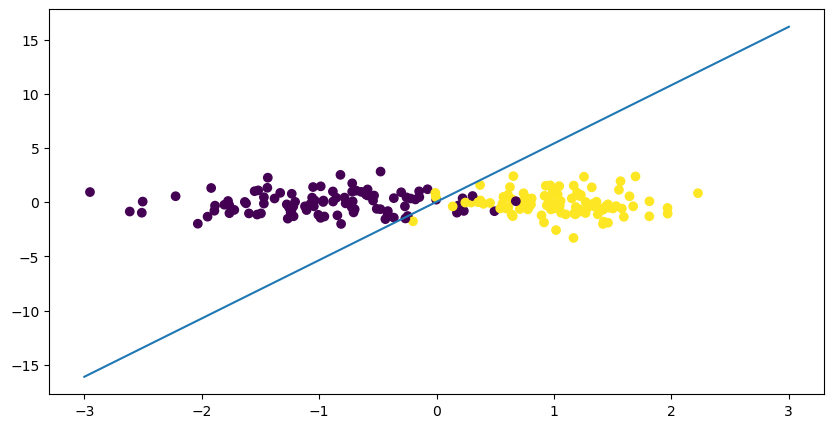

In [99]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=y)

x_input = np.linspace(-3,3,200)
y_output = m*x_input + b


plt.plot(x_input,y_output)